# Intercycle Simulation Project


## The present work contains a Simulation of a Copier of the City of Cuenca

### Systems Engineer
### Simulation
#### Authors
*  ***Maria Jose Pelaez***
*  ***Pedro Bermeo***

<img src="1.jpeg" width="200"> 



*  ***Definition of the problem***


For the development of the present Project, a place of daily life was sought, that is to say, a place where there is a daily movement of clients and in this way we can simulate it, for this it was posed in the following way.

*  **1. Information gathering**


The information used for the simulation of this project will be about a copy room that performs a large number of services, this location is in the city of Cuenca-Ecuador, and to obtain data on the site, on their movements and activities that made, we had to request them from the owner of the premises and she provided us with all the information related to the premises, which can be seen in the following link:

[Information about the Copier](https://drive.google.com/file/d/1-CbTYs70dT227nQBuaqUrANABj0g3YZC/view?usp=sharing)





*  **2. Results expected**


* In the present simulation, we want to determine:
    * The number of customers who arrive at the store for each of the services offered by the Copier.
    * The attention times used by the staff for each of the services.
    * You want to know the average time that is used for each of the services.
   
   
   
   
*  **3. Experiment Plan**


* For the simulation will be tested with the following input data:
    * The maximum number of clients will be randomly between 35 and 300 clients.
    * The simulation will be executed with an execution time of 1700 units.
    * It will be validated with the graphs obtained, in which the number of Customers per Service is detailed, and the time used to attend each service.
    
    
    

*  **4. Variables of Interest**


* The Variables that more weight or importance will have within the simulation of the copier will be.

    * The Copier Offers the following services: (Copies, Banners, Stationery Items, Technological Items, Audio Items, Cell Phone Items, Cell Phone Recharges, Bus Card Recharges, Basic Services Payments and Equipment Maintenance)
    * Maximum number of customers, this varies between 35 and 300 customers
    * Percent of Customer Demand for each service (a) 17%, b) 4%, c) 14%, d) 5%, e) 13%, f) 7%, g) 11%, h) 21% , i) 5%, j) 3%)
    * The times to perform each of the services is as follows: (a) From 1 to 4 minutes depending on the number of copies, b) 3 to 5 minutes, c) From 1 to 3 minutes depending on the order quantity, d) 1 to 2 minutes, e) 3 to 7 minutes, f) 2 to 4 minutes, g) From 1 to 3 minutes depends on the number of recharges and Internet speed for connection to the System, h) 1 to 2 minutes depending on the number of recharges, i) 1 to 5 minutes depending on the speed of the Internet for the connection to the System and the number of payments that are made j) This depends on a maximum of 1 to 4 hours if it is not very complicated repair).
    * Number of employees, there are 2 people who work in the local.
    * Between the 2 people we could perform 4 tasks simultaneously.
    * They can reach up to 6 people at the same time.
    * Clients can arrive in an interval of 1 to 6 minutes.
    * They can wait a maximum time of 5 minutes.
    * Once the client has been attended to in the place, he proceeds to leave.

## Project development

As a first step, we proceed to declare the Autorship of this project

In [1]:
__author__ = "María José Peláez Curillo - Pedro Bermeo"
__copyright__ = "Simulation - Salesian Polytechnic University"
__credits__ = ["María José Peláez Curillo - Pedro Bermeo"]
__license__ = "GPL"
__version__ = "1.0"
__maintainer__ = "María José Peláez Curillo - Pedro Bermeo"
__email__ = "mpelaezc@est.ups.edu.ec - pbermeoa@est.ups.edu.ec"
__status__ = "Production"


### Import of Libraries

Next we import the necessary libraries for the simulation.


In [2]:
import matplotlib.pyplot as pp

import simpy
import random
import numpy as np

%matplotlib inline

### Declaration of variables

It proceeds to declare the variables that are needed for the execution of the simulation, each block of variables has its respective documentation

In [3]:
MAX_CLIENTES = random.randint(35, 300)

NUM_EMPLEADOS = 2

MAX_CLIENTES_LLEGAN = 6

MAX_TAREAS_SIMULTANEAS = 4

MAX_TIEMPO_ESPERA = (1, 5)

T_COPIAS = round(MAX_CLIENTES * (.17))
T_ANILLADOS = round(MAX_CLIENTES * (.04))
T_ARTICULOS_PAPELERIA = round(MAX_CLIENTES * (.14))
T_ARTICULOS_TECNOLOGICOS = round(MAX_CLIENTES * (.05))
T_ARTICULOS_AUDIO = round(MAX_CLIENTES * (.13))
T_ARTICULOS_CELULAR = round(MAX_CLIENTES * (.07))
T_RECARGAS_CELULAR = round(MAX_CLIENTES * (.11))
T_RECARGAS_BUS = round(MAX_CLIENTES * (.21))
T_PAGO_SERVICIOS = round(MAX_CLIENTES * (.05))
T_MANTENIMIENTO_EQUIPOS = round(MAX_CLIENTES * (.03))

TIEMPO_ATENCION_COPIAS = [1, 4]
TIEMPO_ATENCION_ANILLADOS = [3, 5]
TIEMPO_ATENCION_ARTICULOS_PAPELERIA = [1, 3]
TIEMPO_ATENCION_ARTICULOS_TECNOLOGICOS = [1, 2]
TIEMPO_ATENCION_ARTICULOS_AUDIO = [3, 7]
TIEMPO_ATENCION_ARTICULOS_CELULARES = [2, 4]
TIEMPO_ATENCION_RECARGAS_CELULAR = [1, 3]
TIEMPO_ATENCION_RECARGAS_BUS = [1, 2]
TIEMPO_ATENCION_PAGO_SERVICIOS = [1, 5]
TIEMPO_ATENCION_MANTENIMIENTO_EQUIPOS = [60, 240]  # TIEMPO DE ATENCION EN MINUTOS PUES EN HORAS ES DE 1 A 4 HORAS

INTERVALO_LLEGADA = 6

#Se define como varibales GLOBALES QUE SE SUMARAN CADA VEZ QUE LLEGUE UN CLIENTE EN EL METODO LLEGA CLIENTE Y LUEGO PODRAN SER
#GRAFICADAS

CONTADORES= {}
CONTADORES['COPIAS']=0
CONTADORES['ANILLADOS']=0
CONTADORES['PAPELERIA']=0
CONTADORES['TECNOLOGIA']=0
CONTADORES['AUDIO']=0
CONTADORES['ARTICULOS_CELULARES']=0
CONTADORES['RECARGAS_CELULAR']=0
CONTADORES['RECARGAS_BUS']=0
CONTADORES['PAGOS_SERVICIOS']=0
CONTADORES['MANTENIMIENTO']=0

#Se declara un diccionario que calculara los tiempos de atencion para cada servicio
TIEMPOS_CALCULA= {}
TIEMPOS_CALCULA['COPIAS']=0
TIEMPOS_CALCULA['ANILLADOS']=0
TIEMPOS_CALCULA['PAPELERIA']=0
TIEMPOS_CALCULA['TECNOLOGIA']=0
TIEMPOS_CALCULA['AUDIO']=0
TIEMPOS_CALCULA['ARTICULOS_CELULARES']=0
TIEMPOS_CALCULA['RECARGAS_CELULAR']=0
TIEMPOS_CALCULA['RECARGAS_BUS']=0
TIEMPOS_CALCULA['PAGOS_SERVICIOS']=0
TIEMPOS_CALCULA['MANTENIMIENTO']=0

#Se declara un diccionario en el que se almacenara los tiempos de atencion para cada servicio
TIEMPOS= {}
TIEMPOS['COPIAS']=0
TIEMPOS['ANILLADOS']=0
TIEMPOS['PAPELERIA']=0
TIEMPOS['TECNOLOGIA']=0
TIEMPOS['AUDIO']=0
TIEMPOS['ARTICULOS_CELULARES']=0
TIEMPOS['RECARGAS_CELULAR']=0
TIEMPOS['RECARGAS_BUS']=0
TIEMPOS['PAGOS_SERVICIOS']=0
TIEMPOS['MANTENIMIENTO']=0

#Se declara un diccionario en el que se almacenara los promedios de atencion para cada servicio
PROMEDIOS_ATENCION= {}
PROMEDIOS_ATENCION['COPIAS']=0
PROMEDIOS_ATENCION['ANILLADOS']=0
PROMEDIOS_ATENCION['PAPELERIA']=0
PROMEDIOS_ATENCION['TECNOLOGIA']=0
PROMEDIOS_ATENCION['AUDIO']=0
PROMEDIOS_ATENCION['ARTICULOS_CELULARES']=0
PROMEDIOS_ATENCION['RECARGAS_CELULAR']=0
PROMEDIOS_ATENCION['RECARGAS_BUS']=0
PROMEDIOS_ATENCION['PAGOS_SERVICIOS']=0
PROMEDIOS_ATENCION['MANTENIMIENTO']=0

### Client Class Creation

This Class is therefore defined for each Client, we need to store data such as its name and the service it requests in the Copier.

In [4]:
class Cliente:
    def __init__(self, nombre, servicio):
        self.nombre = nombre
        self.servicio = servicio


### Source code of the simulation

Next, there is the source code that is responsible for performing the simulation and the different items, in which each of the methods and the variables used is duly documented.


<<<EXIT>>>	 El Cliente ha salido del local.
COPI-JAS

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Audio-1 a la hora 6.00., con la necesidad de: articulos_audio
El Cliente: Articulos_Audio-1 , espero a ser antendido en la copiadora: 8.00.
El cliente Articulos_Audio-1 , es atendido en la Copiadora, a la hora 8.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Tecnologicos-1 a la hora 11.00., con la necesidad de: articulos_tecnologicos
El Cliente: Articulos_Audio-1 que solicito el servicio: articulos_audio ha sido atendido, a la hora 11.00.
El Cliente: Articulos_Tecnologicos-1 , espero a ser antendido en la copiadora: 16.00.
El cliente Articulos_Tecnologicos-1 , es atendido en la Copiadora, a la hora 16.00.
El Cliente: Articulos_Tecnologicos-1 que solicito el servicio: articulos_tecnologicos ha sido atendido, a la hora 17.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Audio-2 a la hora 18.00., con la necesidad de: articulos_audio
El Cliente: A

El Cliente: Recargas_Bus-3 , espero a ser antendido en la copiadora: 206.00.
El cliente Recargas_Bus-3 , es atendido en la Copiadora, a la hora 206.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Anillados-4 a la hora 208.00., con la necesidad de: anillados
El Cliente: Recargas_Bus-3 que solicito el servicio: recargas_bus ha sido atendido, a la hora 208.00.
El Cliente: Anillados-4 , espero a ser antendido en la copiadora: 211.00.
El cliente Anillados-4 , es atendido en la Copiadora, a la hora 211.00.
El Cliente: Anillados-4 que solicito el servicio: anillados ha sido atendido, a la hora 215.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Audio-5 a la hora 216.00., con la necesidad de: articulos_audio
El Cliente: Articulos_Audio-5 , espero a ser antendido en la copiadora: 217.00.
El cliente Articulos_Audio-5 , es atendido en la Copiadora, a la hora 217.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Bus-4 a la hora 221.00., con la necesidad de: recar

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Celular-9 a la hora 582.00., con la necesidad de: articulos_celulares

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Bus-11 a la hora 588.00., con la necesidad de: recargas_bus

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Celular-8 a la hora 596.00., con la necesidad de: recargas_celular

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Tecnologicos-7 a la hora 604.00., con la necesidad de: articulos_tecnologicos
El Cliente: Mantenimiento-5 que solicito el servicio: mantenimiento_equipos ha sido atendido, a la hora 612.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Celular-10 a la hora 612.00., con la necesidad de: articulos_celulares
El cliente Anillados-9 , es atendido en la Copiadora, a la hora 612.00.
El Cliente: Articulos_Celular-7 , espero a ser antendido en la copiadora: 613.00.
El Cliente: Anillados-9 que solicito el servicio: anillados ha sido atendido, a la hora 617

El cliente Articulos_Celular-12 , es atendido en la Copiadora, a la hora 871.00.
El Cliente: Articulos_Celular-12 que solicito el servicio: articulos_celulares ha sido atendido, a la hora 873.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Bus-18 a la hora 875.00., con la necesidad de: recargas_bus
El Cliente: Recargas_Bus-18 , espero a ser antendido en la copiadora: 876.00.
El cliente Recargas_Bus-18 , es atendido en la Copiadora, a la hora 876.00.
El Cliente: Recargas_Bus-18 que solicito el servicio: recargas_bus ha sido atendido, a la hora 878.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Celular-13 a la hora 882.00., con la necesidad de: articulos_celulares

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Audio-22 a la hora 887.00., con la necesidad de: articulos_audio
El Cliente: Articulos_Celular-13 , espero a ser antendido en la copiadora: 887.00.
El cliente Articulos_Celular-13 , es atendido en la Copiadora, a la hora 887.00.
El Clien

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Articulos_Audio-28 a la hora 1193.00., con la necesidad de: articulos_audio
El Cliente: Articulos_Audio-27 que solicito el servicio: articulos_audio ha sido atendido, a la hora 1193.00.
El Cliente: Articulos_Audio-28 , espero a ser antendido en la copiadora: 1198.00.
El cliente Articulos_Audio-28 , es atendido en la Copiadora, a la hora 1198.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Celular-26 a la hora 1201.00., con la necesidad de: recargas_celular
El Cliente: Recargas_Celular-26 , espero a ser antendido en la copiadora: 1202.00.
El cliente Recargas_Celular-26 , es atendido en la Copiadora, a la hora 1202.00.
El Cliente: Recargas_Celular-26 que solicito el servicio: recargas_celular ha sido atendido, a la hora 1204.00.
El Cliente: Articulos_Audio-28 que solicito el servicio: articulos_audio ha sido atendido, a la hora 1205.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Bus-29 a la hora 1206.00., con

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Bus-48 a la hora 1447.00., con la necesidad de: recargas_bus
El Cliente: Recargas_Bus-48 , espero a ser antendido en la copiadora: 1449.00.
El cliente Recargas_Bus-48 , es atendido en la Copiadora, a la hora 1449.00.
El Cliente: Recargas_Bus-48 que solicito el servicio: recargas_bus ha sido atendido, a la hora 1451.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Copias-39 a la hora 1452.00., con la necesidad de: copias
El Cliente: Copias-39 , espero a ser antendido en la copiadora: 1454.00.
El cliente Copias-39 , es atendido en la Copiadora, a la hora 1454.00.
El Cliente: Copias-39 que solicito el servicio: copias ha sido atendido, a la hora 1455.00.

<<<ARRIVES>>> 	 Llega el Cliente a la copiadora: Recargas_Bus-49 a la hora 1458.00., con la necesidad de: recargas_bus
El Cliente: Recargas_Bus-49 , espero a ser antendido en la copiadora: 1462.00.
El cliente Recargas_Bus-49 , es atendido en la Copiadora, a la hora 1462.00.



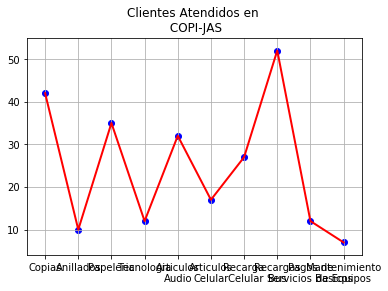

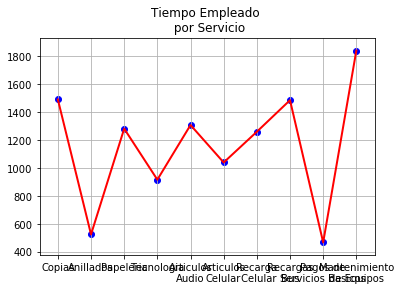

In [5]:
class Copiadora(object):
    #Recibimos los siguientes parametros
    def __init__(self, env, num_empleados, max_tareas_simultaneas, num_clientes_llegan, tiempo_espera_atencion,
                 tiempo_atencion_copias, tiempo_atencion_anillados,
                 tiempo_atencion_articulos_papeleria, tiempo_atencion_articulos_tecnologicos,
                 tiempo_atencion_articulos_audio,
                 tiempo_atencion_articulos_celulares, tiempo_atencion_recargas_celular, tiempo_atencion_recargas_bus,
                 tiempo_atencion_pago_servicios, tiempo_atencion_mantenimiento_equipos):
        # Definimos el Entorno de ejecucion
        self.env = env
        # Se Crea un Recurso para representar el Numero de Empleados
        self.num_empleados = simpy.Resource(env, num_empleados)
        # Se Crea un Recurso para representar el Numero de Tareas Maximas ejecutadas simultaneamente
        self.max_tareas_simultaneas = simpy.Resource(env, max_tareas_simultaneas)
        # Se crea un Recurso para representar la Cantidad de personas que pueden esperar a ser atendidas
        self.num_clientes_llegan = simpy.Resource(env, num_clientes_llegan)
        # Se crea una variable para representar el tiempo que pueden esperar a ser atendidos
        self.max_tiempo_espera_atencion = tiempo_espera_atencion

        # Se define las Variables que representaran, los tiempos de atencion en la copiadora
        # para cada uno de los diferentes servicios que ofrece
        self.tiempo_atencion_copias = tiempo_atencion_copias
        self.tiempo_atencion_anillados = tiempo_atencion_anillados
        self.tiempo_atencion_articulos_papeleria = tiempo_atencion_articulos_papeleria
        self.tiempo_atencion_articulos_tecnologicos = tiempo_atencion_articulos_tecnologicos
        self.tiempo_atencion_articulos_audio = tiempo_atencion_articulos_audio
        self.tiempo_atencion_articulos_celulares = tiempo_atencion_articulos_celulares
        self.tiempo_atencion_recargas_celular = tiempo_atencion_recargas_celular
        self.tiempo_atencion_recargas_bus = tiempo_atencion_recargas_bus
        self.tiempo_atencion_pago_servicios = tiempo_atencion_pago_servicios
        self.tiempo_atencion_mantenimiento_equipos = tiempo_atencion_mantenimiento_equipos

    def atender_cliente(self, cliente, copiadora):
        # Este metodo representa el proceso de atencion a un cliente.
        # Ingresa la Persona y se le atiende

        if (cliente.servicio == 'copias'):
            TIEMPOS_CALCULA['COPIAS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_copias[0], self.tiempo_atencion_copias[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))

            TIEMPOS_CALCULA['COPIAS'] = abs(TIEMPOS_CALCULA['COPIAS']-env.now)
            TIEMPOS['COPIAS']+=TIEMPOS_CALCULA['COPIAS']

        if (cliente.servicio == 'anillados'):
            TIEMPOS_CALCULA['ANILLADOS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_anillados[0], self.tiempo_atencion_anillados[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['ANILLADOS'] = abs(TIEMPOS_CALCULA['ANILLADOS'] - env.now)
            TIEMPOS['ANILLADOS'] += TIEMPOS_CALCULA['ANILLADOS']

        if (cliente.servicio == 'articulos_papeleria'):
            TIEMPOS_CALCULA['PAPELERIA'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_papeleria[0],
                               self.tiempo_atencion_articulos_papeleria[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['PAPELERIA'] = abs(TIEMPOS_CALCULA['PAPELERIA'] - env.now)
            TIEMPOS['PAPELERIA'] += TIEMPOS_CALCULA['PAPELERIA']

        if (cliente.servicio == 'articulos_tecnologicos'):
            TIEMPOS_CALCULA['TECNOLOGIA'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_tecnologicos[0],
                               self.tiempo_atencion_articulos_tecnologicos[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['TECNOLOGIA'] = abs(TIEMPOS_CALCULA['TECNOLOGIA'] - env.now)
            TIEMPOS['TECNOLOGIA'] += TIEMPOS_CALCULA['TECNOLOGIA']

        if (cliente.servicio == 'articulos_audio'):
            TIEMPOS_CALCULA['AUDIO'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_audio[0],
                               self.tiempo_atencion_articulos_audio[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['AUDIO'] = abs(TIEMPOS_CALCULA['AUDIO'] - env.now)
            TIEMPOS['AUDIO'] += TIEMPOS_CALCULA['AUDIO']

        if (cliente.servicio == 'articulos_celulares'):
            TIEMPOS_CALCULA['ARTICULOS_CELULARES'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_articulos_celulares[0],
                               self.tiempo_atencion_articulos_celulares[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['ARTICULOS_CELULARES'] = abs(TIEMPOS_CALCULA['ARTICULOS_CELULARES'] - env.now)
            TIEMPOS['ARTICULOS_CELULARES'] += TIEMPOS_CALCULA['ARTICULOS_CELULARES']

        if (cliente.servicio == 'recargas_celular'):
            TIEMPOS_CALCULA['RECARGAS_CELULAR'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_recargas_celular[0],
                               self.tiempo_atencion_articulos_celulares[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['RECARGAS_CELULAR'] = abs(TIEMPOS_CALCULA['RECARGAS_CELULAR'] - env.now)
            TIEMPOS['RECARGAS_CELULAR'] += TIEMPOS_CALCULA['RECARGAS_CELULAR']

        if (cliente.servicio == 'recargas_bus'):
            TIEMPOS_CALCULA['RECARGAS_BUS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_recargas_bus[0],
                               self.tiempo_atencion_recargas_bus[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['RECARGAS_BUS'] = abs(TIEMPOS_CALCULA['RECARGAS_BUS'] - env.now)
            TIEMPOS['RECARGAS_BUS'] += TIEMPOS_CALCULA['RECARGAS_BUS']

        if (cliente.servicio == 'pago_servicios'):
            TIEMPOS_CALCULA['PAGOS_SERVICIOS'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_pago_servicios[0],
                               self.tiempo_atencion_pago_servicios[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['PAGOS_SERVICIOS'] = abs(TIEMPOS_CALCULA['PAGOS_SERVICIOS'] - env.now)
            TIEMPOS['PAGOS_SERVICIOS'] += TIEMPOS_CALCULA['PAGOS_SERVICIOS']

        if (cliente.servicio == 'mantenimiento_equipos'):
            TIEMPOS_CALCULA['MANTENIMIENTO'] = env.now
            yield self.env.timeout(
                random.randint(self.tiempo_atencion_mantenimiento_equipos[0],
                               self.tiempo_atencion_mantenimiento_equipos[1]))
            print('El Cliente: %s que solicito el servicio: %s ha sido atendido, a la hora %.2f.' % (cliente.nombre,
                                                                                                     cliente.servicio,
                                                                                                     env.now))
            TIEMPOS_CALCULA['MANTENIMIENTO'] = abs(TIEMPOS_CALCULA['MANTENIMIENTO'] - env.now)
            TIEMPOS['MANTENIMIENTO'] += TIEMPOS_CALCULA['MANTENIMIENTO']

    print("<<<EXIT>>>\t El Cliente ha salido del local.")


    def definir_tiempo_cliente(self, cliente, copiadora):
        #Este metodo, simula que el cliente ocupa uno de los 4 espacios de atencion simultanea
        with copiadora.max_tareas_simultaneas.request() as atencionCopiadora:
            # Ocupamos un espacio de atencion
            yield atencionCopiadora
            # Indicamos que el cliente entra a, ser atendido
            print('El cliente %s , es atendido en la Copiadora, a la hora %.2f.' % (cliente.nombre, env.now))
            # Procesamos la atencion en el consultorio
            yield env.process(copiadora.atender_cliente(cliente, copiadora))

def llega_cliente(env, cliente, copiadora):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el cliente a la copiadora
    print('\n<<<ARRIVES>>> \t Llega el Cliente a la copiadora: %s a la hora %.2f., con la necesidad de: %s' % (cliente.nombre, env.now,cliente.servicio))

    # Especificamos que vamos a usar un recurso (Resource) que representa
    # un espacio de espera, de las 6 disponibles

    with copiadora.num_clientes_llegan.request() as clienteLlega:
        # Ocupamos un espacio de clientes que llegan
        yield clienteLlega
        yield env.timeout(random.randint(copiadora.max_tiempo_espera_atencion[0], copiadora.max_tiempo_espera_atencion[1]))
        # Indicamos que la persona llego a la copiadora
        print('El Cliente: %s , espero a ser antendido en la copiadora: %.2f.' % (cliente.nombre, env.now))
        # Procesamos la operacion de definir tiempos de atencion
        yield env.process(copiadora.definir_tiempo_cliente(cliente, copiadora))

def ejecutar_simulacion(env, num_empleados, max_tareas_simultaneas, num_clientes_llegan, tiempo_espera_atencion,
                        tiempo_atencion_copias, tiempo_atencion_anillados,
                        tiempo_atencion_articulos_papeleria, tiempo_atencion_articulos_tecnologicos,
                        tiempo_atencion_articulos_audio,
                        tiempo_atencion_articulos_celulares, tiempo_atencion_recargas_celular,
                        tiempo_atencion_recargas_bus,
                        tiempo_atencion_pago_servicios, tiempo_atencion_mantenimiento_equipos, intervalo):
    copiadora = Copiadora(env, num_empleados, max_tareas_simultaneas, num_clientes_llegan, tiempo_espera_atencion,
                          tiempo_atencion_copias, tiempo_atencion_anillados,
                          tiempo_atencion_articulos_papeleria, tiempo_atencion_articulos_tecnologicos,
                          tiempo_atencion_articulos_audio,
                          tiempo_atencion_articulos_celulares, tiempo_atencion_recargas_celular,
                          tiempo_atencion_recargas_bus,
                          tiempo_atencion_pago_servicios, tiempo_atencion_mantenimiento_equipos)

    estado = True
    while estado == True:

        # Procedemos a generar un Cliente de Cualquier Servicio randomicamente en donde:
        ''''
        SE genera los siguientes números que corresponden a los siguientes servicios:
        1. - CLIENTE PARA COPIAS
        2. - CLIENTE PARA ANILLADOS
        3. - CLIENTE PARA PAPELERIA
        4. - CLIENTE PARA TECNOLOGIA
        5. - CLIENTE PARA AUDIO
        6. - CLIENTE PARA ARTICULOS DE CELULARES
        7. - CLIENTE PARA RECARGAS DE CELULAR
        8. - CLIENTE PARA RECARGAS DE BUS
        9. - CLIENTE PARA PAGO DE SERVICIOS BASICOS
        10. - CLIENTE PARA MANTENIMIENTO DE EQUIPO
        '''
        opcionGenera = random.randint(1, 10)

        # Validamos que si ya no se puede generar mas clientes para Copias, se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 1) and (CONTADORES['COPIAS'] == T_COPIAS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 1:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Copias-%d' % (CONTADORES['COPIAS'] + 1), 'copias')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['COPIAS'] += 1
            TIEMPOS['COPIAS'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Anillados, se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 2) and (CONTADORES['ANILLADOS'] == T_ANILLADOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 2:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Anillados-%d' % (CONTADORES['ANILLADOS'] + 1), 'anillados')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['ANILLADOS'] += 1
            TIEMPOS['ANILLADOS'] = env.now


        # Validamos que si ya no se puede generar mas clientes para Papeleria, se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 3) and (CONTADORES['PAPELERIA'] == T_ARTICULOS_PAPELERIA)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 3:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Papeleria-%d' % (CONTADORES['PAPELERIA'] + 1), 'articulos_papeleria')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['PAPELERIA'] += 1
            TIEMPOS['PAPELERIA'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Articulos de Tecnologia,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 4) and (CONTADORES['TECNOLOGIA'] == T_ARTICULOS_TECNOLOGICOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 4:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Articulos_Tecnologicos-%d' % (CONTADORES['TECNOLOGIA'] + 1), 'articulos_tecnologicos')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['TECNOLOGIA'] += 1
            TIEMPOS['TECNOLOGIA'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Articulos Audio,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 5) and (CONTADORES['AUDIO'] == T_ARTICULOS_AUDIO)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 5:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Articulos_Audio-%d' % (CONTADORES['AUDIO'] + 1), 'articulos_audio')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['AUDIO'] += 1
            TIEMPOS['AUDIO'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Articulos de Celulares,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 6) and (CONTADORES['ARTICULOS_CELULARES'] == T_ARTICULOS_CELULAR)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 6:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Articulos_Celular-%d' % (CONTADORES['ARTICULOS_CELULARES'] + 1), 'articulos_celulares')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['ARTICULOS_CELULARES'] += 1
            TIEMPOS['ARTICULOS_CELULARES'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Recargas Celular,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 7) and (CONTADORES['RECARGAS_CELULAR'] == T_RECARGAS_CELULAR)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 7:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Recargas_Celular-%d' % (CONTADORES['RECARGAS_CELULAR'] + 1), 'recargas_celular')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['RECARGAS_CELULAR'] += 1
            TIEMPOS['RECARGAS_CELULAR'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Recargas de Bus,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 8) and (CONTADORES['RECARGAS_BUS'] == T_RECARGAS_BUS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 8:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Recargas_Bus-%d' % (CONTADORES['RECARGAS_BUS'] + 1), 'recargas_bus')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['RECARGAS_BUS'] += 1
            TIEMPOS['RECARGAS_BUS'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Pago de Servicios Basicos,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 9) and (CONTADORES['PAGOS_SERVICIOS'] == T_PAGO_SERVICIOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 9:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Pago_Servicios-%d' % (CONTADORES['PAGOS_SERVICIOS'] + 1), 'pago_servicios')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['PAGOS_SERVICIOS'] += 1
            TIEMPOS['PAGOS_SERVICIOS'] = env.now

        # Validamos que si ya no se puede generar mas clientes para Mantenimiento de Equipos,
        # se vuelva a generar otro cliente de otro servicio
        excedio = True
        while excedio == True:
            if ((opcionGenera == 10) and (CONTADORES['MANTENIMIENTO'] == T_MANTENIMIENTO_EQUIPOS)):
                opcionGenera = random.randint(1, 10)
            else:
                excedio = False

        if opcionGenera == 10:
            yield env.timeout(random.randint(intervalo - 2, intervalo + 2))
            cliente = Cliente('Mantenimiento-%d' % (CONTADORES['MANTENIMIENTO'] + 1), 'mantenimiento_equipos')
            env.process(llega_cliente(env, cliente, copiadora))
            CONTADORES['MANTENIMIENTO'] += 1
            TIEMPOS['MANTENIMIENTO'] = env.now
        # Si ya no puedo generar mas Clientes entonces se termina la ejecucion
        if ((CONTADORES['COPIAS'] >= T_COPIAS) and (CONTADORES['ANILLADOS'] >= T_ANILLADOS) and (
                CONTADORES['PAPELERIA'] >= T_ARTICULOS_PAPELERIA) and
                (CONTADORES['TECNOLOGIA'] >= T_ARTICULOS_TECNOLOGICOS) and (CONTADORES['AUDIO'] >= T_ARTICULOS_AUDIO) and
                (CONTADORES['ARTICULOS_CELULARES'] >= T_ARTICULOS_CELULAR) and (CONTADORES['RECARGAS_CELULAR'] >= T_ARTICULOS_CELULAR) and
                (CONTADORES['RECARGAS_BUS'] >= T_RECARGAS_BUS) and (CONTADORES['PAGOS_SERVICIOS'] >= T_PAGO_SERVICIOS) and (
                        CONTADORES['MANTENIMIENTO'] >= T_MANTENIMIENTO_EQUIPOS)):
            print("<<<ALERTA>>> No existen más clientes, por el día de hoy, se procede a cerrar el local por hoy.\n")
            estado = False


print('COPI-JAS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_EMPLEADOS, MAX_TAREAS_SIMULTANEAS, MAX_CLIENTES_LLEGAN, MAX_TIEMPO_ESPERA,
                                TIEMPO_ATENCION_COPIAS, TIEMPO_ATENCION_ANILLADOS, TIEMPO_ATENCION_ARTICULOS_PAPELERIA,
                                TIEMPO_ATENCION_ARTICULOS_TECNOLOGICOS, TIEMPO_ATENCION_ARTICULOS_AUDIO,
                                TIEMPO_ATENCION_ARTICULOS_CELULARES, TIEMPO_ATENCION_RECARGAS_CELULAR,
                                TIEMPO_ATENCION_RECARGAS_BUS,
                                TIEMPO_ATENCION_PAGO_SERVICIOS, TIEMPO_ATENCION_MANTENIMIENTO_EQUIPOS,
                                INTERVALO_LLEGADA))
env.run(until=1700)
#Calculamos los promedios de Tiempo de atencion por cada uno de los servicios de la copiadora:
PROMEDIOS_ATENCION['COPIAS']=TIEMPOS['COPIAS'] / CONTADORES['COPIAS']
PROMEDIOS_ATENCION['ANILLADOS']=TIEMPOS['ANILLADOS'] / CONTADORES['ANILLADOS']
PROMEDIOS_ATENCION['PAPELERIA']=TIEMPOS['PAPELERIA'] / CONTADORES['PAPELERIA']
PROMEDIOS_ATENCION['TECNOLOGIA']=TIEMPOS['TECNOLOGIA'] / CONTADORES['TECNOLOGIA']
PROMEDIOS_ATENCION['AUDIO']=TIEMPOS['AUDIO'] / CONTADORES['AUDIO']
PROMEDIOS_ATENCION['ARTICULOS_CELULARES']=TIEMPOS['ARTICULOS_CELULARES'] / CONTADORES['ARTICULOS_CELULARES']
PROMEDIOS_ATENCION['RECARGAS_CELULAR']=TIEMPOS['RECARGAS_CELULAR'] / CONTADORES['RECARGAS_CELULAR']
PROMEDIOS_ATENCION['RECARGAS_BUS']=TIEMPOS['RECARGAS_BUS'] / CONTADORES['RECARGAS_BUS']
PROMEDIOS_ATENCION['PAGOS_SERVICIOS']=TIEMPOS['PAGOS_SERVICIOS'] / CONTADORES['PAGOS_SERVICIOS']
PROMEDIOS_ATENCION['MANTENIMIENTO']=TIEMPOS['MANTENIMIENTO'] / CONTADORES['MANTENIMIENTO']

print('\n************************************************** RESULTADOS DE LA SIMULACION **************************************************')

print('******************************************************** CLIENTES ATENDIDOS *******************************************************')
print(CONTADORES, '\n')
print('********************************************** TIEMPOS DE ATENCION PARA CADA SERVICIO *********************************************')
print(TIEMPOS, '\n')
print('********************************************** PROMEDIO DE ATENCION POR CADA SERVICIO **********************************************')
print(PROMEDIOS_ATENCION, "\n")

# Generamos la grafica de los Clientes Atendidos

y = (CONTADORES['COPIAS'], CONTADORES['ANILLADOS'], CONTADORES['PAPELERIA'], CONTADORES['TECNOLOGIA'],
     CONTADORES['AUDIO'], CONTADORES['ARTICULOS_CELULARES'], CONTADORES['RECARGAS_CELULAR'],
     CONTADORES['RECARGAS_BUS'], CONTADORES['PAGOS_SERVICIOS'], CONTADORES['MANTENIMIENTO'])
x = ["Copias", "Anillados", "Papeleria", "Tecnologia", "Articulos\nAudio", "Articulos\nCelular", "Recarga\n Celular",
     "Recargas\nBus","Pagos de\nServicios Basicos", "Mantenimiento\nde Equipos"]
xn = range(len(x))
pp.plot(xn, y,linewidth=2, color='red')
pp.xticks(xn, x)
#pp.plot(x, y, linewidth=2, color='red')
pp.scatter(xn, y, color='blue')
pp.grid(True)
pp.title("Clientes Atendidos en \n COPI-JAS")
pp.show()

# Generamos la grafica de Los tiempos en que han sido atendidos cada uno de los servicios
y = (TIEMPOS['COPIAS'], TIEMPOS['ANILLADOS'], TIEMPOS['PAPELERIA'], TIEMPOS['TECNOLOGIA'],
     TIEMPOS['AUDIO'], TIEMPOS['ARTICULOS_CELULARES'], TIEMPOS['RECARGAS_CELULAR'],
     TIEMPOS['RECARGAS_BUS'], TIEMPOS['PAGOS_SERVICIOS'], TIEMPOS['MANTENIMIENTO'])
x = ["Copias", "Anillados", "Papeleria", "Tecnologia", "Articulos\nAudio", "Articulos\nCelular", "Recarga\n Celular",
     "Recargas\nBus","Pagos de\nServicios Basicos", "Mantenimiento\nde Equipos"]
xn = range(len(x))
pp.plot(xn, y,linewidth=2, color='red')
pp.xticks(xn, x)
#pp.plot(x, y, linewidth=2, color='red')
pp.scatter(xn, y, color='blue')
pp.grid(True)
pp.title("Tiempo Empleado \n por Servicio")
pp.show()

### Explicative Video

The following video contains an explanation of the developed project, which explains the explanation of the source code, and the functionality of the project, the video is loaded in Google Drive, which is why when you click on the link the Google Drive will open and they will be able to watch the video.



[View or download the Video](https://drive.google.com/file/d/1kDYD8J_0XvsQnA8vliklVuSAui4PF4CK/view)